In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from bayes_opt import BayesianOptimization
import scipy.interpolate
from time import time

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
FOLDS = 4
N_JOBS = 6
SEED = 2016

#DATA = "Base"
#DATA = "Time"
DATA = "Medians"
#DATA = "Lags"


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Get data
train_y1b1 = pd.read_csv("clean_data/train_y1b1_" + DATA + ".csv")
train_y1b2 = pd.read_csv("clean_data/train_y1b2_" + DATA + ".csv")
train_y1b3 = pd.read_csv("clean_data/train_y1b3_" + DATA + ".csv")
train_y1b4 = pd.read_csv("clean_data/train_y1b4_" + DATA + ".csv")

train_y2b1 = pd.read_csv("clean_data/train_y2b1_" + DATA + ".csv")
train_y2b2 = pd.read_csv("clean_data/train_y2b2_" + DATA + ".csv")
train_y2b4 = pd.read_csv("clean_data/train_y2b4_" + DATA + ".csv")

train_y3b3 = pd.read_csv("clean_data/train_y3b3_" + DATA + ".csv")

train_y4b1 = pd.read_csv("clean_data/train_y4b1_" + DATA + ".csv")
train_y4b2 = pd.read_csv("clean_data/train_y4b2_" + DATA + ".csv")
train_y4b4 = pd.read_csv("clean_data/train_y4b4_" + DATA + ".csv")

train_y5b1 = pd.read_csv("clean_data/train_y5b1_" + DATA + ".csv")
train_y5b2 = pd.read_csv("clean_data/train_y5b2_" + DATA + ".csv")
train_y5b3 = pd.read_csv("clean_data/train_y5b3_" + DATA + ".csv")
train_y5b4 = pd.read_csv("clean_data/train_y5b4_" + DATA + ".csv")
###
X_train_y1b1 = pd.read_csv("clean_data/X_train_y1b1_" + DATA + ".csv")
X_train_y1b2 = pd.read_csv("clean_data/X_train_y1b2_" + DATA + ".csv")
X_train_y1b3 = pd.read_csv("clean_data/X_train_y1b3_" + DATA + ".csv")
X_train_y1b4 = pd.read_csv("clean_data/X_train_y1b4_" + DATA + ".csv")

X_train_y2b1 = pd.read_csv("clean_data/X_train_y2b1_" + DATA + ".csv")
X_train_y2b2 = pd.read_csv("clean_data/X_train_y2b2_" + DATA + ".csv")
X_train_y2b4 = pd.read_csv("clean_data/X_train_y2b4_" + DATA + ".csv")

X_train_y3b3 = pd.read_csv("clean_data/X_train_y3b3_" + DATA + ".csv")

X_train_y4b1 = pd.read_csv("clean_data/X_train_y4b1_" + DATA + ".csv")
X_train_y4b2 = pd.read_csv("clean_data/X_train_y4b2_" + DATA + ".csv")
X_train_y4b4 = pd.read_csv("clean_data/X_train_y4b4_" + DATA + ".csv")

X_train_y5b1 = pd.read_csv("clean_data/X_train_y5b1_" + DATA + ".csv")
X_train_y5b2 = pd.read_csv("clean_data/X_train_y5b2_" + DATA + ".csv")
X_train_y5b3 = pd.read_csv("clean_data/X_train_y5b3_" + DATA + ".csv")
X_train_y5b4 = pd.read_csv("clean_data/X_train_y5b4_" + DATA + ".csv")
###
X_trainVal_y1b1 = pd.read_csv("clean_data/X_trainVal_y1b1_" + DATA + ".csv")
X_trainVal_y1b2 = pd.read_csv("clean_data/X_trainVal_y1b2_" + DATA + ".csv")
X_trainVal_y1b3 = pd.read_csv("clean_data/X_trainVal_y1b3_" + DATA + ".csv")
X_trainVal_y1b4 = pd.read_csv("clean_data/X_trainVal_y1b4_" + DATA + ".csv")

X_trainVal_y2b1 = pd.read_csv("clean_data/X_trainVal_y2b1_" + DATA + ".csv")
X_trainVal_y2b2 = pd.read_csv("clean_data/X_trainVal_y2b2_" + DATA + ".csv")
X_trainVal_y2b4 = pd.read_csv("clean_data/X_trainVal_y2b4_" + DATA + ".csv")

X_trainVal_y3b3 = pd.read_csv("clean_data/X_trainVal_y3b3_" + DATA + ".csv")

X_trainVal_y4b1 = pd.read_csv("clean_data/X_trainVal_y4b1_" + DATA + ".csv")
X_trainVal_y4b2 = pd.read_csv("clean_data/X_trainVal_y4b2_" + DATA + ".csv")
X_trainVal_y4b4 = pd.read_csv("clean_data/X_trainVal_y4b4_" + DATA + ".csv")

X_trainVal_y5b1 = pd.read_csv("clean_data/X_trainVal_y5b1_" + DATA + ".csv")
X_trainVal_y5b2 = pd.read_csv("clean_data/X_trainVal_y5b2_" + DATA + ".csv")
X_trainVal_y5b3 = pd.read_csv("clean_data/X_trainVal_y5b3_" + DATA + ".csv")
X_trainVal_y5b4 = pd.read_csv("clean_data/X_trainVal_y5b4_" + DATA + ".csv")
###
'''test = pd.read_csv("clean_data/test_" + DATA + ".csv")'''
test_y1b1 = pd.read_csv("clean_data/test_y1b1_" + DATA + ".csv")
test_y1b2 = pd.read_csv("clean_data/test_y1b2_" + DATA + ".csv")
test_y1b3 = pd.read_csv("clean_data/test_y1b3_" + DATA + ".csv")
test_y1b4 = pd.read_csv("clean_data/test_y1b4_" + DATA + ".csv")

test_y2b1 = pd.read_csv("clean_data/test_y2b1_" + DATA + ".csv")
test_y2b2 = pd.read_csv("clean_data/test_y2b2_" + DATA + ".csv")
test_y2b4 = pd.read_csv("clean_data/test_y2b4_" + DATA + ".csv")

test_y3b3 = pd.read_csv("clean_data/test_y3b3_" + DATA + ".csv")

test_y4b1 = pd.read_csv("clean_data/test_y4b1_" + DATA + ".csv")
test_y4b2 = pd.read_csv("clean_data/test_y4b2_" + DATA + ".csv")
test_y4b4 = pd.read_csv("clean_data/test_y4b4_" + DATA + ".csv")

test_y5b1 = pd.read_csv("clean_data/test_y5b1_" + DATA + ".csv")
test_y5b2 = pd.read_csv("clean_data/test_y5b2_" + DATA + ".csv")
test_y5b3 = pd.read_csv("clean_data/test_y5b3_" + DATA + ".csv")
test_y5b4 = pd.read_csv("clean_data/test_y5b4_" + DATA + ".csv")
###
X_test_y1b1 = pd.read_csv("clean_data/X_test_y1b1_" + DATA + ".csv")
X_test_y1b2 = pd.read_csv("clean_data/X_test_y1b2_" + DATA + ".csv")
X_test_y1b3 = pd.read_csv("clean_data/X_test_y1b3_" + DATA + ".csv")
X_test_y1b4 = pd.read_csv("clean_data/X_test_y1b4_" + DATA + ".csv")

X_test_y2b1 = pd.read_csv("clean_data/X_test_y2b1_" + DATA + ".csv")
X_test_y2b2 = pd.read_csv("clean_data/X_test_y2b2_" + DATA + ".csv")
X_test_y2b4 = pd.read_csv("clean_data/X_test_y2b4_" + DATA + ".csv")

X_test_y3b3 = pd.read_csv("clean_data/X_test_y3b3_" + DATA + ".csv")

X_test_y4b1 = pd.read_csv("clean_data/X_test_y4b1_" + DATA + ".csv")
X_test_y4b2 = pd.read_csv("clean_data/X_test_y4b2_" + DATA + ".csv")
X_test_y4b4 = pd.read_csv("clean_data/X_test_y4b4_" + DATA + ".csv")

X_test_y5b1 = pd.read_csv("clean_data/X_test_y5b1_" + DATA + ".csv")
X_test_y5b2 = pd.read_csv("clean_data/X_test_y5b2_" + DATA + ".csv")
X_test_y5b3 = pd.read_csv("clean_data/X_test_y5b3_" + DATA + ".csv")
X_test_y5b4 = pd.read_csv("clean_data/X_test_y5b4_" + DATA + ".csv")
###
X_testVal_y1b1 = pd.read_csv("clean_data/X_testVal_y1b1_" + DATA + ".csv")
X_testVal_y1b2 = pd.read_csv("clean_data/X_testVal_y1b2_" + DATA + ".csv")
X_testVal_y1b3 = pd.read_csv("clean_data/X_testVal_y1b3_" + DATA + ".csv")
X_testVal_y1b4 = pd.read_csv("clean_data/X_testVal_y1b4_" + DATA + ".csv")

X_testVal_y2b1 = pd.read_csv("clean_data/X_testVal_y2b1_" + DATA + ".csv")
X_testVal_y2b2 = pd.read_csv("clean_data/X_testVal_y2b2_" + DATA + ".csv")
X_testVal_y2b4 = pd.read_csv("clean_data/X_testVal_y2b4_" + DATA + ".csv")

X_testVal_y3b3 = pd.read_csv("clean_data/X_testVal_y3b3_" + DATA + ".csv")

X_testVal_y4b1 = pd.read_csv("clean_data/X_testVal_y4b1_" + DATA + ".csv")
X_testVal_y4b2 = pd.read_csv("clean_data/X_testVal_y4b2_" + DATA + ".csv")
X_testVal_y4b4 = pd.read_csv("clean_data/X_testVal_y4b4_" + DATA + ".csv")

X_testVal_y5b1 = pd.read_csv("clean_data/X_testVal_y5b1_" + DATA + ".csv")
X_testVal_y5b2 = pd.read_csv("clean_data/X_testVal_y5b2_" + DATA + ".csv")
X_testVal_y5b3 = pd.read_csv("clean_data/X_testVal_y5b3_" + DATA + ".csv")
X_testVal_y5b4 = pd.read_csv("clean_data/X_testVal_y5b4_" + DATA + ".csv")
###
y_y1b1 = pd.read_csv("clean_data/y_y1b1.csv")
y_y1b2 = pd.read_csv("clean_data/y_y1b2.csv")
y_y1b3 = pd.read_csv("clean_data/y_y1b3.csv")
y_y1b4 = pd.read_csv("clean_data/y_y1b4.csv")

y_y2b1 = pd.read_csv("clean_data/y_y2b1.csv")
y_y2b2 = pd.read_csv("clean_data/y_y2b2.csv")
y_y2b4 = pd.read_csv("clean_data/y_y2b4.csv")

y_y3b3 = pd.read_csv("clean_data/y_y3b3.csv")

y_y4b1 = pd.read_csv("clean_data/y_y4b1.csv")
y_y4b2 = pd.read_csv("clean_data/y_y4b2.csv")
y_y4b4 = pd.read_csv("clean_data/y_y4b4.csv")

y_y5b1 = pd.read_csv("clean_data/y_y5b1.csv")
y_y5b2 = pd.read_csv("clean_data/y_y5b2.csv")
y_y5b3 = pd.read_csv("clean_data/y_y5b3.csv")
y_y5b4 = pd.read_csv("clean_data/y_y5b4.csv")
###
y_train_y1b1 = pd.read_csv("clean_data/y_train_y1b1.csv")
y_train_y1b2 = pd.read_csv("clean_data/y_train_y1b2.csv")
y_train_y1b3 = pd.read_csv("clean_data/y_train_y1b3.csv")
y_train_y1b4 = pd.read_csv("clean_data/y_train_y1b4.csv")

y_train_y2b1 = pd.read_csv("clean_data/y_train_y2b1.csv")
y_train_y2b2 = pd.read_csv("clean_data/y_train_y2b2.csv")
y_train_y2b4 = pd.read_csv("clean_data/y_train_y2b4.csv")

y_train_y3b3 = pd.read_csv("clean_data/y_train_y3b3.csv")

y_train_y4b1 = pd.read_csv("clean_data/y_train_y4b1.csv")
y_train_y4b2 = pd.read_csv("clean_data/y_train_y4b2.csv")
y_train_y4b4 = pd.read_csv("clean_data/y_train_y4b4.csv")

y_train_y5b1 = pd.read_csv("clean_data/y_train_y5b1.csv")
y_train_y5b2 = pd.read_csv("clean_data/y_train_y5b2.csv")
y_train_y5b3 = pd.read_csv("clean_data/y_train_y5b3.csv")
y_train_y5b4 = pd.read_csv("clean_data/y_train_y5b4.csv")
###
y_trainVal_y1b1 = pd.read_csv("clean_data/y_trainVal_y1b1.csv")
y_trainVal_y1b2 = pd.read_csv("clean_data/y_trainVal_y1b2.csv")
y_trainVal_y1b3 = pd.read_csv("clean_data/y_trainVal_y1b3.csv")
y_trainVal_y1b4 = pd.read_csv("clean_data/y_trainVal_y1b4.csv")

y_trainVal_y2b1 = pd.read_csv("clean_data/y_trainVal_y2b1.csv")
y_trainVal_y2b2 = pd.read_csv("clean_data/y_trainVal_y2b2.csv")
y_trainVal_y2b4 = pd.read_csv("clean_data/y_trainVal_y2b4.csv")

y_trainVal_y3b3 = pd.read_csv("clean_data/y_trainVal_y3b3.csv")

y_trainVal_y4b1 = pd.read_csv("clean_data/y_trainVal_y4b1.csv")
y_trainVal_y4b2 = pd.read_csv("clean_data/y_trainVal_y4b2.csv")
y_trainVal_y4b4 = pd.read_csv("clean_data/y_trainVal_y4b4.csv")

y_trainVal_y5b1 = pd.read_csv("clean_data/y_trainVal_y5b1.csv")
y_trainVal_y5b2 = pd.read_csv("clean_data/y_trainVal_y5b2.csv")
y_trainVal_y5b3 = pd.read_csv("clean_data/y_trainVal_y5b3.csv")
y_trainVal_y5b4 = pd.read_csv("clean_data/y_trainVal_y5b4.csv")
###
y_test_y1b1 = pd.read_csv("clean_data/y_test_y1b1.csv")
y_test_y1b2 = pd.read_csv("clean_data/y_test_y1b2.csv")
y_test_y1b3 = pd.read_csv("clean_data/y_test_y1b3.csv")
y_test_y1b4 = pd.read_csv("clean_data/y_test_y1b4.csv")

y_test_y2b1 = pd.read_csv("clean_data/y_test_y2b1.csv")
y_test_y2b2 = pd.read_csv("clean_data/y_test_y2b2.csv")
y_test_y2b4 = pd.read_csv("clean_data/y_test_y2b4.csv")

y_test_y3b3 = pd.read_csv("clean_data/y_test_y3b3.csv")

y_test_y4b1 = pd.read_csv("clean_data/y_test_y4b1.csv")
y_test_y4b2 = pd.read_csv("clean_data/y_test_y4b2.csv")
y_test_y4b4 = pd.read_csv("clean_data/y_test_y4b4.csv")

y_test_y5b1 = pd.read_csv("clean_data/y_test_y5b1.csv")
y_test_y5b2 = pd.read_csv("clean_data/y_test_y5b2.csv")
y_test_y5b3 = pd.read_csv("clean_data/y_test_y5b3.csv")
y_test_y5b4 = pd.read_csv("clean_data/y_test_y5b4.csv")
###
y_testVal_y1b1 = pd.read_csv("clean_data/y_testVal_y1b1.csv")
y_testVal_y1b2 = pd.read_csv("clean_data/y_testVal_y1b2.csv")
y_testVal_y1b3 = pd.read_csv("clean_data/y_testVal_y1b3.csv")
y_testVal_y1b4 = pd.read_csv("clean_data/y_testVal_y1b4.csv")

y_testVal_y2b1 = pd.read_csv("clean_data/y_testVal_y2b1.csv")
y_testVal_y2b2 = pd.read_csv("clean_data/y_testVal_y2b2.csv")
y_testVal_y2b4 = pd.read_csv("clean_data/y_testVal_y2b4.csv")

y_testVal_y3b3 = pd.read_csv("clean_data/y_testVal_y3b3.csv")

y_testVal_y4b1 = pd.read_csv("clean_data/y_testVal_y4b1.csv")
y_testVal_y4b2 = pd.read_csv("clean_data/y_testVal_y4b2.csv")
y_testVal_y4b4 = pd.read_csv("clean_data/y_testVal_y4b4.csv")

y_testVal_y5b1 = pd.read_csv("clean_data/y_testVal_y5b1.csv")
y_testVal_y5b2 = pd.read_csv("clean_data/y_testVal_y5b2.csv")
y_testVal_y5b3 = pd.read_csv("clean_data/y_testVal_y5b3.csv")
y_testVal_y5b4 = pd.read_csv("clean_data/y_testVal_y5b4.csv")

In [3]:
def xgb_mse(preds, dtrain) :
    labels = dtrain.get_label()
    return ("mse", mean_squared_error(preds, labels))

def run_xgb(xg_params, X_trainVal, y_trainVal, X_testVal, y_testVal, X_train, y_train) :
    xg_trainVal = xgb.DMatrix(X_trainVal, label = y_trainVal)
    xg_testVal = xgb.DMatrix(X_testVal, label = y_testVal)
    xg_train = xgb.DMatrix(X_train, label = y_train)
    
    watchlist = [(xg_trainVal, "train"), (xg_testVal, "eval")]    
    
    # Train model
    xg = xgb.train(
        params = xg_params,
        dtrain = xg_trainVal,
        evals = watchlist, 
        num_boost_round = 100000,
        feval = xgb_mse, 
        maximize = False,
        early_stopping_rounds = 100,
        verbose_eval = False)
    
    xg = xgb.train(
        params = xg_params, 
        dtrain = xg_train, 
        num_boost_round = int(xg.best_ntree_limit / 0.67),
        feval = xgb_mse, 
        maximize = False,
        verbose_eval = False)

    return (xg_testVal, xg)

In [4]:
def run_all(max_depth, gamma, min_child_weight, subsample, colsample_bytree, colsample_bylevel, base_score) :
    # Generate y_test predictions to be able to optimize ensemble weights
    xg_params = {"eta" : 0.3, "max_depth" : int(max_depth), "min_child_weight" : int(min_child_weight), 
                 "subsample" : subsample, "colsample_bytree" : colsample_bytree, "colsample_bylevel" : colsample_bylevel, 
                 "base_score" : base_score}
    #print(xg_params)
    
    xg_test_y1b1 = xgb.DMatrix(X_test_y1b1)
    xg_test_y1b2 = xgb.DMatrix(X_test_y1b2)
    xg_test_y1b3 = xgb.DMatrix(X_test_y1b3)
    xg_test_y1b4 = xgb.DMatrix(X_test_y1b4)

    xg_test_y2b1 = xgb.DMatrix(X_test_y2b1)
    xg_test_y2b2 = xgb.DMatrix(X_test_y2b2)
    xg_test_y2b4 = xgb.DMatrix(X_test_y2b4)

    xg_test_y3b3 = xgb.DMatrix(X_test_y3b3)

    xg_test_y4b1 = xgb.DMatrix(X_test_y4b1)
    xg_test_y4b2 = xgb.DMatrix(X_test_y4b2)
    xg_test_y4b4 = xgb.DMatrix(X_test_y4b4)

    xg_test_y5b1 = xgb.DMatrix(X_test_y5b1)
    xg_test_y5b2 = xgb.DMatrix(X_test_y5b2)
    xg_test_y5b3 = xgb.DMatrix(X_test_y5b3)
    xg_test_y5b4 = xgb.DMatrix(X_test_y5b4)

    xg_val, xg = run_xgb(xg_params, X_trainVal_y1b1, y_trainVal_y1b1.y1, X_testVal_y1b1, y_testVal_y1b1.y1, X_train_y1b1, y_train_y1b1.y1)
    #preds_y_val_y1b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y1b1 = xg.predict(xg_test_y1b1) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y1b2, y_trainVal_y1b2.y1, X_testVal_y1b2, y_testVal_y1b2.y1, X_train_y1b2, y_train_y1b2.y1)
    #preds_y_val_y1b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y1b2 = xg.predict(xg_test_y1b2)
    xg_val, xg = run_xgb(xg_params, X_trainVal_y1b3, y_trainVal_y1b3.y1, X_testVal_y1b3, y_testVal_y1b3.y1, X_train_y1b3, y_train_y1b3.y1)
    #preds_y_val_y1b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y1b3 = xg.predict(xg_test_y1b3) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y1b4, y_trainVal_y1b4.y1, X_testVal_y1b4, y_testVal_y1b4.y1, X_train_y1b4, y_train_y1b4.y1)
    #preds_y_val_y1b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y1b4 = xg.predict(xg_test_y1b4)    

    xg_val, xg = run_xgb(xg_params, X_trainVal_y2b1, y_trainVal_y2b1.y2, X_testVal_y2b1, y_testVal_y2b1.y2, X_train_y2b1, y_train_y2b1.y2)
    #preds_y_val_y2b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y2b1 = xg.predict(xg_test_y2b1) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y2b2, y_trainVal_y2b2.y2, X_testVal_y2b2, y_testVal_y2b2.y2, X_train_y2b2, y_train_y2b2.y2)
    #preds_y_val_y2b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y2b2 = xg.predict(xg_test_y2b2)
    xg_val, xg = run_xgb(xg_params, X_trainVal_y2b4, y_trainVal_y2b4.y2, X_testVal_y2b4, y_testVal_y2b4.y2, X_train_y2b4, y_train_y2b4.y2)
    #preds_y_val_y2b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y2b4 = xg.predict(xg_test_y2b4)    

    xg_val, xg = run_xgb(xg_params, X_trainVal_y3b3, y_trainVal_y3b3.y3, X_testVal_y3b3, y_testVal_y3b3.y3, X_train_y3b3, y_train_y3b3.y3)
    #preds_y_val_y3b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y3b3 = xg.predict(xg_test_y3b3) 

    xg_val, xg = run_xgb(xg_params, X_trainVal_y4b1, y_trainVal_y4b1.y4, X_testVal_y4b1, y_testVal_y4b1.y4, X_train_y4b1, y_train_y4b1.y4)
    #preds_y_val_y4b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y4b1 = xg.predict(xg_test_y4b1) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y4b2, y_trainVal_y4b2.y4, X_testVal_y4b2, y_testVal_y4b2.y4, X_train_y4b2, y_train_y4b2.y4)
    #preds_y_val_y4b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y4b2 = xg.predict(xg_test_y4b2)
    xg_val, xg = run_xgb(xg_params, X_trainVal_y4b4, y_trainVal_y4b4.y4, X_testVal_y4b4, y_testVal_y4b4.y4, X_train_y4b4, y_train_y4b4.y4)
    #preds_y_val_y4b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y4b4 = xg.predict(xg_test_y4b4)    

    xg_val, xg = run_xgb(xg_params, X_trainVal_y5b1, y_trainVal_y5b1.y5, X_testVal_y5b1, y_testVal_y5b1.y5, X_train_y5b1, y_train_y5b1.y5)
    #preds_y_val_y5b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y5b1 = xg.predict(xg_test_y5b1) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y5b2, y_trainVal_y5b2.y5, X_testVal_y5b2, y_testVal_y5b2.y5, X_train_y5b2, y_train_y5b2.y5)
    #preds_y_val_y5b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y5b2 = xg.predict(xg_test_y5b2)
    xg_val, xg = run_xgb(xg_params, X_trainVal_y5b3, y_trainVal_y5b3.y5, X_testVal_y5b3, y_testVal_y5b3.y5, X_train_y5b3, y_train_y5b3.y5)
    #preds_y_val_y5b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y5b3 = xg.predict(xg_test_y5b3) 
    xg_val, xg = run_xgb(xg_params, X_trainVal_y5b4, y_trainVal_y5b4.y5, X_testVal_y5b4, y_testVal_y5b4.y5, X_train_y5b4, y_train_y5b4.y5)
    #preds_y_val_y5b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
    preds_y_test_y5b4 = xg.predict(xg_test_y5b4)    

    # Compute average error
    totalError_y1b1 = mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1) * y_test_y1b1.shape[0]
    totalError_y1b2 = mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2) * y_test_y1b2.shape[0]
    totalError_y1b3 = mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3) * y_test_y1b3.shape[0]
    totalError_y1b4 = mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4) * y_test_y1b4.shape[0]

    totalError_y2b1 = mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1) * y_test_y2b1.shape[0]
    totalError_y2b2 = mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2) * y_test_y2b2.shape[0]
    totalError_y2b4 = mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4) * y_test_y2b4.shape[0]

    totalError_y3b3 = mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3) * y_test_y3b3.shape[0]

    totalError_y4b1 = mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1) * y_test_y4b1.shape[0]
    totalError_y4b2 = mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2) * y_test_y4b2.shape[0]
    totalError_y4b4 = mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4) * y_test_y4b4.shape[0]

    totalError_y5b1 = mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1) * y_test_y5b1.shape[0]
    totalError_y5b2 = mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2) * y_test_y5b2.shape[0]
    totalError_y5b3 = mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3) * y_test_y5b3.shape[0]
    totalError_y5b4 = mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4) * y_test_y5b4.shape[0]

    avgError = (totalError_y1b1 + totalError_y1b2 + totalError_y1b3 + totalError_y1b4 + totalError_y2b1 + totalError_y2b2 + 
               totalError_y2b4 + totalError_y3b3 + totalError_y4b1 + totalError_y4b2+ totalError_y4b4 + totalError_y5b1 + 
               totalError_y5b2 + totalError_y5b3 + totalError_y5b4) / (y_test_y1b1.shape[0] + y_test_y1b2.shape[0] + 
                                                                       y_test_y1b3.shape[0] + y_test_y1b4.shape[0])
    #print("avgError : " + str(avgError))    
    
    return((-1) * avgError)

In [10]:
max_depth_min = 2
max_depth_max = 20
gamma_min = 0.001
gamma_max = 0.1
min_child_weight_min = 1
min_child_weight_max = 50
subsample_min = 0.1
subsample_max = 1
colsample_bytree_min = 0.3
colsample_bytree_max = 1
colsample_bylevel_min = 0.3
colsample_bylevel_max = 1
base_score_min = 0
base_score_max = 1

start = time()
xgbBO = BayesianOptimization(run_all, {
                                "max_depth" : (max_depth_min, max_depth_max), 
                                "gamma" : (gamma_min, gamma_max),
                                "min_child_weight" : (min_child_weight_min, min_child_weight_max),
                                "subsample" : (subsample_min, subsample_max),
                                "colsample_bytree" : (colsample_bytree_min, colsample_bytree_max),
                                "colsample_bylevel" : (colsample_bylevel_min, colsample_bylevel_max), 
                                "base_score" : (base_score_min, base_score_max),        
    })

In [11]:
xgbBO.explore({
              "max_depth" : [8, 2, 7, 20, 6, 15, 6, 3, 7, 12],
              "gamma" : [0.005, 0.001, 0.01, 0.005, 0.01, 0.1, 0.005, 0.05, 0.01, 0.05], 
              "min_child_weight" : [1, 4, 50, 30, 3, 8, 9, 20, 5, 10],
              "subsample" : [0.1, 0.4, 1, 0.2, 0.6, 0.4, 0.3, 0.9, 0.4, 0.8],
              "colsample_bytree" : [0.5, 0.7, 0.8, 0.3, 1, 0.6, 0.3, 0.6, 0.5, 0.3], 
              "colsample_bylevel" :  [0.3, 0.5, 0.3, 1, 0.7, 0.9, 1, 0.3, 0.8, 0.4],
              "base_score" : [0, 0.6, 0.9, 1, 0.4, 0.5, 0.6, 0.1, 0.2, 0.1], 
              })

In [12]:
init_points = 10
num_iter = 170
xgbBO.maximize(init_points = init_points, n_iter = num_iter)
print("BayesianOptimization took %.2f seconds" % ((time() - start)))

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   base_score |   colsample_bylevel |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
    1 | 00m05s | -14655.38375 |       0.0000 |              0.3000 |             0.5000 |    0.0050 |      8.0000 |             1.0000 |      0.1000 | 
    2 | 00m05s | -11678.24051 |       0.6000 |              0.5000 |             0.7000 |    0.0010 |      2.0000 |             4.0000 |      0.4000 | 
    3 | 00m08s | -9194.00730 |       0.9000 |              0.3000 |             0.8000 |    0.0100 |      7.0000 |            50.0000 |      1.0000 | 
    4 | 00m07s | -10424.71843 |       1.0000 |              1.0000 |             0.3000 |    0.0050 |     20.0000 |            30.0000 |      0.2000 | 
    5 | 00m05s | -8213.50218 |       0.4000 |              0.7000 |            

C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.1991868]), 'nit': 2, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'warnflag': 2}
  " state: %s" % convergence_dict)


  124 | 00m10s | -8858.34752 |       0.1992 |              0.4216 |             0.8240 |    0.0942 |     15.1179 |             6.2037 |      0.5176 | 
  125 | 00m07s | -8588.61822 |       0.9108 |              0.4737 |             0.8366 |    0.0177 |      8.3557 |            10.1497 |      0.3584 | 
  126 | 00m06s | -17809.30067 |       0.0000 |              0.3000 |             1.0000 |    0.1000 |      5.1558 |            33.5271 |      0.1000 | 
  127 | 00m08s | -10604.12032 |       0.5627 |              0.9210 |             0.8539 |    0.0595 |      5.2765 |            35.6030 |      0.2780 | 
  128 | 00m06s | -8881.62893 |       0.7659 |              0.7576 |             0.7066 |    0.0095 |      4.8067 |            36.0326 |      0.3403 | 
  129 | 00m08s | -21125.22384 |       0.0000 |              1.0000 |             0.3000 |    0.0010 |     16.1064 |            50.0000 |      0.1000 | 
  130 | 00m09s | -20713.10914 |       0.3934 |              0.4052 |             0.4397 |  

In [114]:
history_df = pd.DataFrame(xgbBO.res["all"]["params"])
history_df2 = pd.DataFrame(xgbBO.res["all"]["values"])
history_df = pd.concat((history_df, history_df2), axis = 1)
history_df.rename(columns = { 0 : "RMSE"}, inplace = True)
history_df.index.names = ["Iteration"]
history_df.sort_values(["RMSE"], ascending = False, inplace = True)

#history_df = history_df[history_df.RMSE > -9000]
display(history_df.head(10))

history_df.to_csv("./BO_XGB_" + DATA + ".csv")

,base_score,colsample_bylevel,colsample_bytree,gamma,max_depth,min_child_weight,subsample,RMSE
Iteration,,,,,,,,
39,0.822,0.729,0.772,0.082,4.944,13.383,0.569,-7962.425
101,0.877,0.669,0.557,0.044,13.941,1.418,0.889,-8005.259
99,0.253,0.657,0.770,0.051,5.980,25.700,0.697,-8035.666
152,0.472,0.752,0.324,0.062,19.696,49.506,0.483,-8251.505
41,0.572,0.782,0.529,0.017,3.565,29.246,0.780,-8257.293
138,0.690,0.554,0.375,0.083,16.676,36.454,0.973,-8262.156
145,0.553,0.662,0.724,0.097,15.314,5.184,0.955,-8313.104
60,0.000,1.000,1.000,0.100,10.985,37.089,1.000,-8321.821
40,1.000,1.000,1.000,0.001,6.560,13.861,1.000,-8360.370


In [214]:
def graphBO(param1, param2, param1min, param1max, param2min, param2max, ratio) :
    x, y, z = history_df[param1].values, history_df[param2].values, history_df["RMSE"].values

    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(param1min, param1max, 100), np.linspace(param2min, param2max, 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate
    rbf = scipy.interpolate.Rbf(x, y, z, function = "multiquadric", smooth = 0.5)
    zi = rbf(xi, yi)

    plt.figure()
    plt.imshow(zi, 
               cmap = "plasma", 
               aspect = ratio,
               vmin = z.min(), 
               vmax = z.max(), 
               origin = "lower",
               extent = [param1min, param1max, param2min, param2max])
    q = plt.scatter(x, y, c = z, cmap = "plasma")
    plt.colorbar(q)
    plt.xlabel(param1)
    plt.ylabel(param2)
    #plt.savefig("figures/XGB_" + param1 + "_" + param2 + ".png")
    plt.show(block = False)

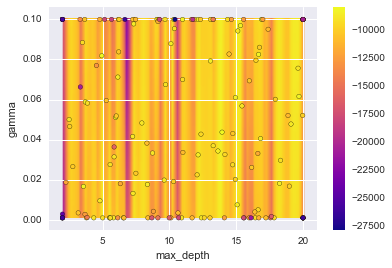

In [215]:
graphBO("max_depth", "gamma", max_depth_min, max_depth_max, gamma_min, gamma_max, 150)

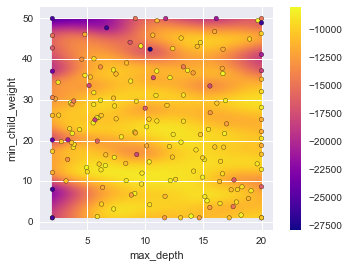

In [216]:
graphBO("max_depth", "min_child_weight", max_depth_min, max_depth_max, min_child_weight_min, min_child_weight_max, 0.35)

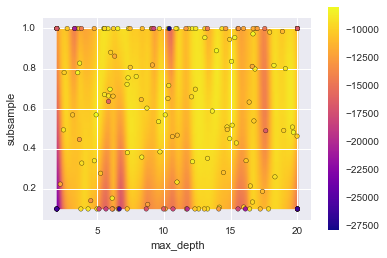

In [217]:
graphBO("max_depth", "subsample", max_depth_min, max_depth_max, subsample_min, subsample_max, 15)

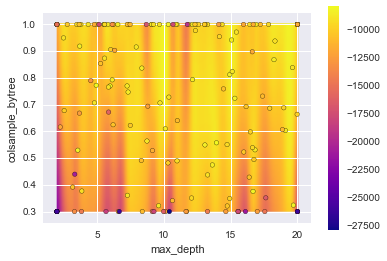

In [218]:
graphBO("max_depth", "colsample_bytree", max_depth_min, max_depth_max, colsample_bytree_min, colsample_bytree_max, 20)

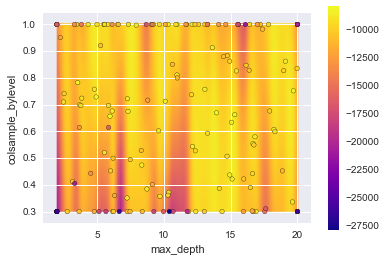

In [219]:
graphBO("max_depth", "colsample_bylevel", max_depth_min, max_depth_max, colsample_bylevel_min, colsample_bylevel_max, 20)

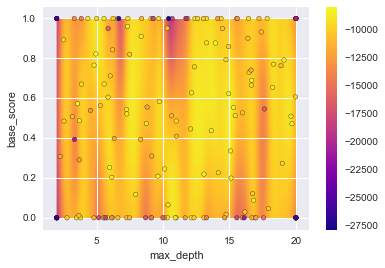

In [220]:
graphBO("max_depth", "base_score", max_depth_min, max_depth_max, base_score_min, base_score_max, 15)

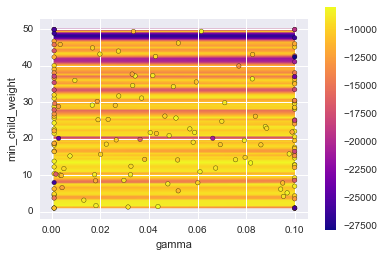

In [221]:
graphBO("gamma", "min_child_weight", gamma_min, gamma_max, min_child_weight_min, min_child_weight_max, 0.0015)

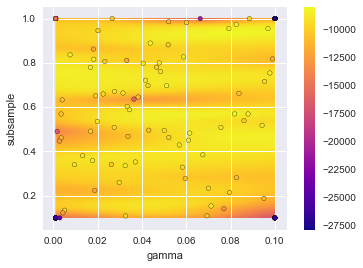

In [222]:
graphBO("gamma", "subsample", gamma_min, gamma_max, subsample_min, subsample_max, 0.10)

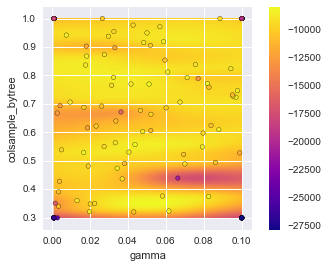

In [223]:
graphBO("gamma", "colsample_bytree", gamma_min, gamma_max, colsample_bytree_min, colsample_bytree_max, 0.15)

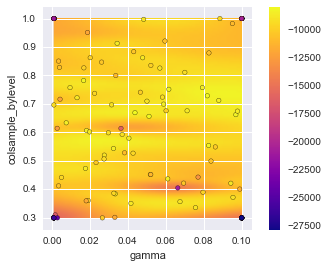

In [224]:
graphBO("gamma", "colsample_bylevel", gamma_min, gamma_max, colsample_bylevel_min, colsample_bylevel_max, 0.15)

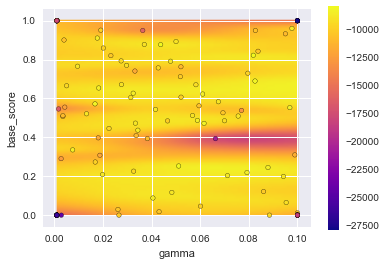

In [225]:
graphBO("gamma", "base_score", gamma_min, gamma_max, base_score_min, base_score_max, 0.08)

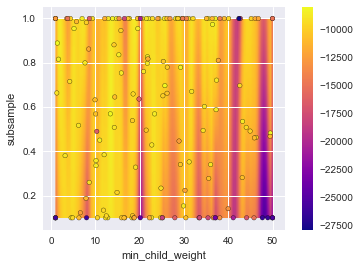

In [226]:
graphBO("min_child_weight", "subsample", min_child_weight_min, min_child_weight_max, subsample_min, subsample_max, 50)

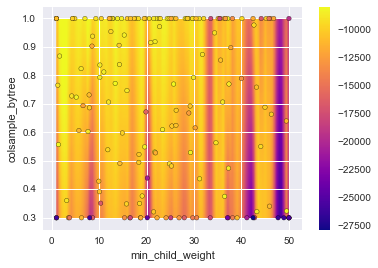

In [227]:
graphBO("min_child_weight", "colsample_bytree", min_child_weight_min, min_child_weight_max, colsample_bytree_min, colsample_bytree_max, 60)

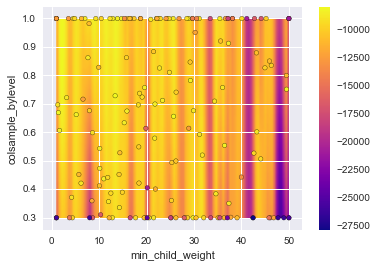

In [228]:
graphBO("min_child_weight", "colsample_bylevel", min_child_weight_min, min_child_weight_max, colsample_bylevel_min, colsample_bylevel_max, 60)

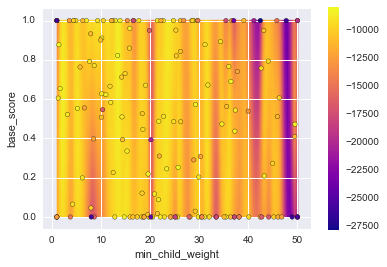

In [229]:
graphBO("min_child_weight", "base_score", min_child_weight_min, min_child_weight_max, base_score_min, base_score_max, 40)

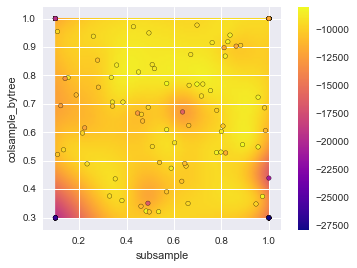

In [230]:
graphBO("subsample", "colsample_bytree", subsample_min, subsample_max, colsample_bytree_min, colsample_bytree_max, 1.2)

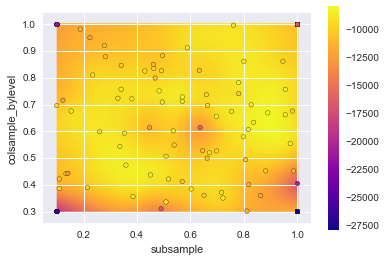

In [231]:
graphBO("subsample", "colsample_bylevel", subsample_min, subsample_max, colsample_bylevel_min, colsample_bylevel_max, 1.0)

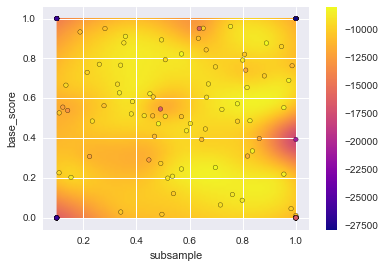

In [232]:
graphBO("subsample", "base_score", subsample_min, subsample_max, base_score_min, base_score_max, 0.75)

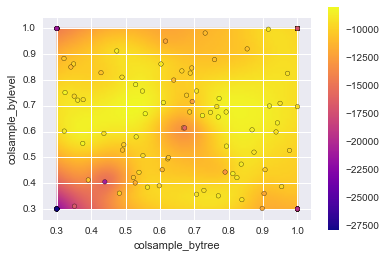

In [233]:
graphBO("colsample_bytree", "colsample_bylevel", colsample_bytree_min, colsample_bytree_max, colsample_bylevel_min, colsample_bylevel_max, 0.75)

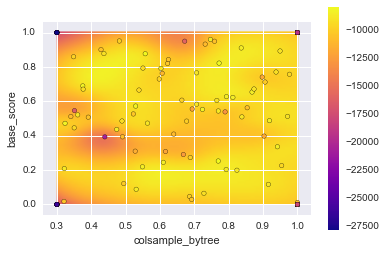

In [234]:
graphBO("colsample_bytree", "base_score", colsample_bytree_min, colsample_bytree_max, base_score_min, base_score_max, 0.5)